# Provenance model

The object of this migration is to migrate over 4000 MS Access databases to comma separated values. This is done with the aid of the Java library [Axxess](https://github.com/DANS-repo/axxess), which will create a `*._metadata.csv` for each database converted and a `{db name}.{table name}.csv` for each table found in the database. After conversion all `*.csv` files will be in a folder with the name of the database, where the `.` dot between filename and extension (`mdb` or `accdb`) will be replaced with an `_` underscore.

Because for now the implementation of the model will be recorded in RDF-statements in the RELS-EXT datastream of Fedora Digital Objects (DO), we will restrict the implementation of the model. We will be using DO's that will be created anyhow. The only DO that will be established for the sake of implementing the provenance model is the `info:fedora/migration:1` Activity.

## Participants in the model
Here we brievely sum up the participants in the model. A participant may not be implemented in the RDF model, but may be indicated. Example: the SoftwareAgent `Axxess` is not modelled as an `Agent`, but is indicated by a URL to the github repository. DANS as an organization and the primary `Agent` that initiates the `Action` of migration is not implemeted and not indicated in the model. Between curly brackets the multiplicity of the instances.

- **Organization (Agent)** - DANS-KNAW as organization (not implemented, not indicated). {1}
- **Person (Agent)** - DANS employee acting in the role of Technical Archivist on behalve of DANS (not implemented, indicated by mail address). {1}
- **SoftwareAgent (Agent)** - Axxess conversion library (not implemeted, indicated by URL). {1}
- **Agent** - The description of the migration on github (this repository) (not implemented, indicated by URL). {1}
- **Activity** `fedora:migration:1` - (this migration) will be created as DO under `info:fedora:migration:x`, where `x` is a serial number. {1}
- **Entity** `fedora:easy-file:1` - Existing `.mdb` or `.accdb` file (an MS Access database) that is to be converted. {n}
- **Collection (Entity)** `fedora:easy-folder:100` - Newly created folder grouping the resultant `.csv` files. {n}
- **Entity** `fedora:easy-file:100` - Resultant `.csv` file containing database metadata. {n}
- **Entity** `fedora:easy-file:20x` - Resultant `.csv` file containing table data. {&#8733; tables}

### Setting up the provenance model

In [1]:
from prov.model import ProvDocument

doc = ProvDocument()
doc.add_namespace('fedora', 'info:fedora/')
doc.add_namespace('fm', 'info:fedora/fedora-system:def/model#')
doc.add_namespace('ghdr', 'https://github.com/DANS-repo/')
doc.add_namespace('mailto', 'mailto:')

# existing before migration
ta1 = doc.agent('mailto:firstname.lastname@dans.knaw.nl', {'prov:hadRole': 'Technical Archivist'})
axxess1 = doc.agent('ghdr:axxess/releases/tag/1.0.1', {'prov:type': 'prov:SoftwareAgent'})
migration201801 = doc.agent('ghdr:migr201801')
migr1 = doc.activity('fedora:migration:1', '2018', '2018', {'fm:label': 'migr201801'})
ms_acc1 = doc.entity('fedora:easy-file:1', {'fm:label': 'mydb1.mdb'})

# resultants of migration
csv_folder1 = doc.collection('fedora:easy-folder:100', {'fm:label': 'mydb1_mdb'})
csv_md1 = doc.entity('fedora:easy-file:100', {'fm:label': 'mydb1.mdb._metadata.csv'})
csv_tbl_a1 = doc.entity('fedora:easy-file:201', {'fm:label': 'mydb1.mdb.tableA.csv'})
csv_tbl_b1 = doc.entity('fedora:easy-file:202', {'fm:label': 'mydb1.mdb.tableB.csv'})

# edges
doc.wasAssociatedWith('fedora:migration:1', 'mailto:firstname.lastname@dans.knaw.nl')
doc.wasAssociatedWith('fedora:migration:1', 'ghdr:axxess/releases/tag/1.0.1')
doc.wasAssociatedWith('fedora:migration:1', 'ghdr:migr201801')
doc.used('fedora:migration:1', 'fedora:easy-file:1')
doc.wasGeneratedBy('fedora:easy-folder:100', 'fedora:migration:1')
doc.wasDerivedFrom('fedora:easy-folder:100', 'fedora:easy-file:1')
doc.hadMember('fedora:easy-folder:100', 'fedora:easy-file:100')
doc.hadMember('fedora:easy-folder:100', 'fedora:easy-file:201')
doc.hadMember('fedora:easy-folder:100', 'fedora:easy-file:202')
doc.wasGeneratedBy('fedora:easy-file:100', 'fedora:migration:1')
doc.wasGeneratedBy('fedora:easy-file:201', 'fedora:migration:1')
doc.wasGeneratedBy('fedora:easy-file:202', 'fedora:migration:1')
doc.wasDerivedFrom('fedora:easy-file:100', 'fedora:easy-file:1')
doc.wasDerivedFrom('fedora:easy-file:201', 'fedora:easy-file:1')
doc.wasDerivedFrom('fedora:easy-file:202', 'fedora:easy-file:1')

<ProvDerivation: (fedora:easy-file:202, fedora:easy-file:1)>

### Draw the model

Only `Entities` and `Activity` in the *fedora* namespace are or will be ingested in Fedora. `Agents` will not be present in Fedora. The edges from `Activity` to `Agents` will be expressed in the RELS_EXT of `fedora:migration:1`.

In [2]:
from prov.dot import prov_to_dot
dot = prov_to_dot(doc)
dot.write_png('migration-prov.png')
dot.write_pdf('migration-prov.pdf')

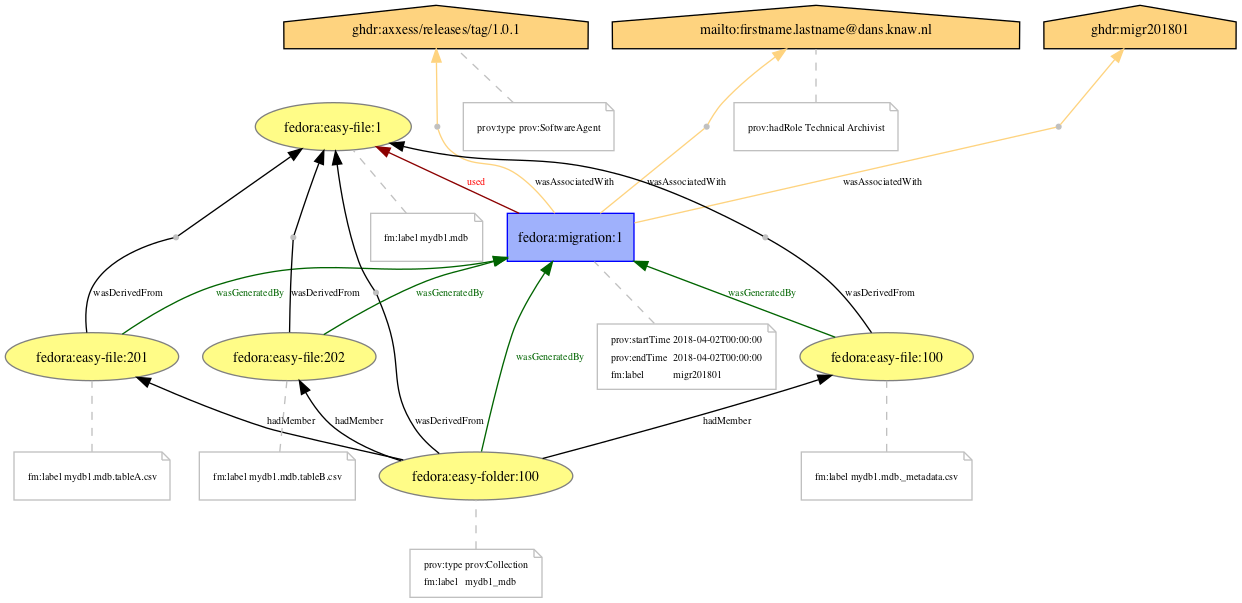

In [3]:
from IPython.display import Image
Image('migration-prov.png')

*Provenance model that can be expressed using RELS-EXT datastreams of Fedora digital objects. The only *extra* digital object required for implementation is the *prov:Activity* `fedora:migration:1`. See [pdf version](migration-prov.pdf) of this image.*

### PROV-N notation

In [5]:
print(doc.get_provn())

document
  prefix fedora <info:fedora/>
  prefix fm <info:fedora/fedora-system:def/model#>
  prefix ghdr <https://github.com/DANS-repo/>
  prefix mailto <mailto:>
  
  agent(mailto:firstname.lastname@dans.knaw.nl, [prov:hadRole="Technical Archivist"])
  agent(ghdr:axxess/releases/tag/1.0.1, [prov:type="prov:SoftwareAgent"])
  agent(ghdr:migr201801)
  activity(fedora:migration:1, 2018-04-02T00:00:00, 2018-04-02T00:00:00, [fm:label="migr201801"])
  entity(fedora:easy-file:1, [fm:label="mydb1.mdb"])
  entity(fedora:easy-folder:100, [fm:label="mydb1_mdb", prov:type='prov:Collection'])
  entity(fedora:easy-file:100, [fm:label="mydb1.mdb._metadata.csv"])
  entity(fedora:easy-file:201, [fm:label="mydb1.mdb.tableA.csv"])
  entity(fedora:easy-file:202, [fm:label="mydb1.mdb.tableB.csv"])
  wasAssociatedWith(fedora:migration:1, mailto:firstname.lastname@dans.knaw.nl, -)
  wasAssociatedWith(fedora:migration:1, ghdr:axxess/releases/tag/1.0.1, -)
  wasAssociatedWith(fedora:migration:1, ghdr:migr2018

### PROV-O notation using TURTLE

In [6]:
doc.serialize('migration-prov.ttl', format='rdf', rdf_format='ttl')

In [7]:
!cat migration-prov.ttl

@prefix fedora: <info:fedora/> .
@prefix fm: <info:fedora/fedora-system:def/model#> .
@prefix ghdr: <https://github.com/DANS-repo/> .
@prefix mailto: <mailto:> .
@prefix prov: <http://www.w3.org/ns/prov#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xml: <http://www.w3.org/XML/1998/namespace> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<info:fedora/easy-folder:100> a prov:Collection,
        prov:Entity ;
    prov:hadMember <info:fedora/easy-file:100>,
        <info:fedora/easy-file:201>,
        <info:fedora/easy-file:202> ;
    prov:wasDerivedFrom <info:fedora/easy-file:1> ;
    prov:wasGeneratedBy <info:fedora/migration:1> ;
    fm:label "mydb1_mdb"^^xsd:string .

<https://github.com/DANS-repo/axxess/releases/tag/1.0.1> a prov:Agent,
        "prov:SoftwareAgent"^^xsd:string .

ghdr:migr201801 a prov:Agent .

<info:fedora/easy-file:100> a prov:Entity ;
    prov:wasDerivedFrom <info:fedora/easy

### PROV-XML notation

In [8]:
doc.serialize('migration-prov.xml', format='rdf', rdf_format='xml')

In [9]:
!cat migration-prov.xml

<?xml version="1.0" encoding="UTF-8"?>
<rdf:RDF
   xmlns:fm="info:fedora/fedora-system:def/model#"
   xmlns:prov="http://www.w3.org/ns/prov#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="info:fedora/migration:1">
    <rdf:type rdf:resource="http://www.w3.org/ns/prov#Activity"/>
    <fm:label rdf:datatype="http://www.w3.org/2001/XMLSchema#string">migr201801</fm:label>
    <prov:used rdf:resource="info:fedora/easy-file:1"/>
    <prov:wasAssociatedWith rdf:resource="https://github.com/DANS-repo/axxess/releases/tag/1.0.1"/>
    <prov:endedAtTime rdf:datatype="http://www.w3.org/2001/XMLSchema#dateTime">2018-04-02T00:00:00</prov:endedAtTime>
    <prov:startedAtTime rdf:datatype="http://www.w3.org/2001/XMLSchema#dateTime">2018-04-02T00:00:00</prov:startedAtTime>
    <prov:wasAssociatedWith rdf:resource="https://github.com/DANS-repo/migr201801"/>
    <prov:wasAssociatedWith rdf:resource="mailto:firstname.lastname@dans.knaw.nl"/>
  </rdf:Description